In [1]:
from NN import * 
from preprocess import *

In [3]:
def plot(train_loss,val_loss,train_eval,val_eval):
    import matplotlib.pyplot as plt
    import pandas as pd 
    epochs = range(1, len(train_loss) + 1)

    # loss graph
    plt.plot(epochs, train_loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'y-', label='Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    train_eval = pd.DataFrame(train_eval)
    val_eval = pd.DataFrame(val_eval)
    # accuracy graph
    plt.plot(epochs, list(train_eval["Accuracy"]), 'b-', label='Training Accuracy')
    plt.plot(epochs, list(val_eval["Accuracy"]), 'y-', label='Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

    # macro f1 graph 
    plt.plot(epochs, list(train_eval["Macro_F1"]), 'b-', label='Training Macro F1')
    plt.plot(epochs, list(val_eval["Macro_F1"]), 'y-', label='Validation Macro F1')

    plt.title('Training and Validation Macro F1')
    plt.xlabel('Epochs')
    plt.ylabel('Macro F1')
    plt.legend()

    plt.show()
    

In [4]:
def eval(model,X,y,batch_size=1024,plot_cm=False):
    num_batches = (len(X)+batch_size-1)//batch_size

    from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
    import numpy as np


    y_true = y.T.argmax(axis=0)
    y_pred = np.concatenate([model(X[i*batch_size:(i+1)*batch_size].T).argmax(axis=0) for i in range(num_batches)])

    macro_f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)

    # print(f'Macro F1 Score: {macro_f1}')
    # print(f'Accuracy: {accuracy}')
    if plot_cm:
        from sklearn.metrics import confusion_matrix
        import matplotlib.pyplot as plt
        import seaborn as sns

        cm = confusion_matrix(y_true, y_pred)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 27), yticklabels=range(1, 27))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

    return {"Accuracy":accuracy,"Macro_F1":macro_f1} 

def best_model_comparator(model1,model1_eval,model2,model2_eval):
    if model2 is None or model2_eval is None:
        return model1,model1_eval  
    if model1 is None or model1_eval is None:
        return model2,model2_eval
    
    if model1_eval["Macro_F1"] > model2_eval["Macro_F1"]:
        return model1,model1_eval 
    return model2,model2_eval 

In [5]:
X_train,y_train,X_test,y_test=preprocess_EMNIST() 

In [10]:
model = NN(Linear(28*28,1024),ReLU(),Dropout(0.3),Linear(1024,26),Softmax())
model

Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax

In [11]:
train_loss,val_loss,train_eval,val_eval = model.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) # learning_rate_scheduler=lambda epoch,i_lr:i_lr)

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(30.0%)_Linear(1024,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.03719055123580423, val_loss[epoch]=0.2692592247263005, train_eval[epoch]={'Accuracy': 0.8576923076923076, 'Macro_F1': 0.8574079820846993}, val_eval[epoch]={'Accuracy': 0.8395833333333333, 'Macro_F1': 0.8389490699610711}
epoch=1, train_loss[epoch]=0.02372064267680407, val_loss[epoch]=0.24007291583786627, train_eval[epoch]={'Accuracy': 0.875933257918552, 'Macro_F1': 0.875377468946685}, val_eval[epoch]={'Accuracy': 0.8526175213675213, 'Macro_F1': 0.8514053374174206}
epoch=2, train_loss[epoch]=0.021763302405636367, val_loss[epoch]=0.21840307169395584, train_eval[epoch]={'Accuracy': 0.8897341628959275, 'Macro_F1': 0.8893961381696036}, val_eval[epoch]={'Accuracy': 0.8610042735042736, 'Macro_F1': 0.8602591625342223}
epoch=3, train_loss[epoch]=0.020241681371488747, val_loss[epoch]=0.2159339715276001, train_eval[epoch]={'Accuracy': 0.8932

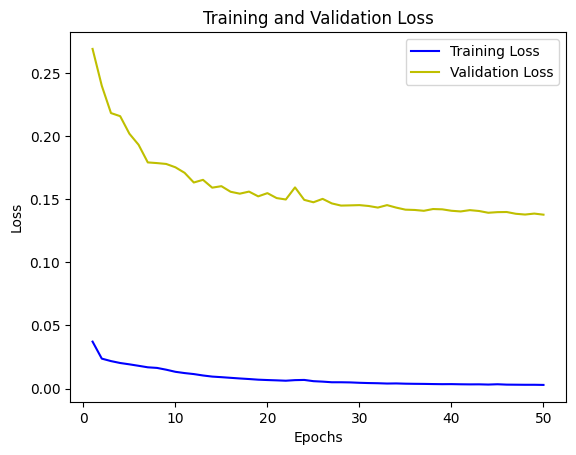

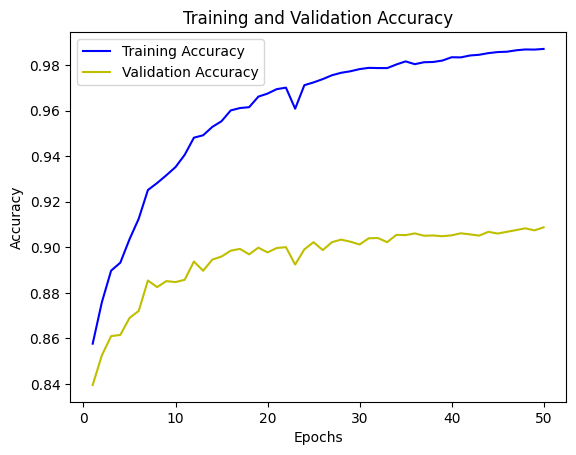

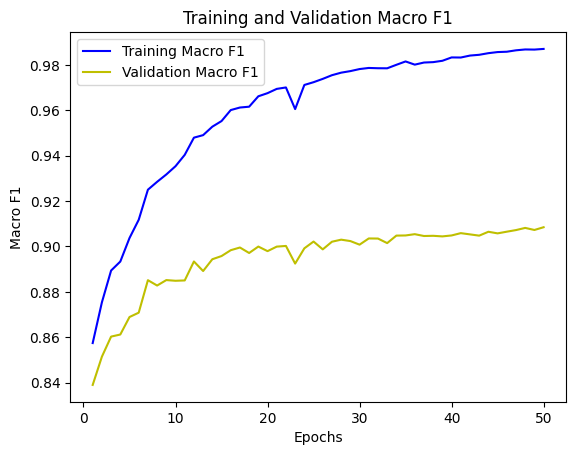

In [14]:
plot(train_loss,val_loss,train_eval,val_eval)

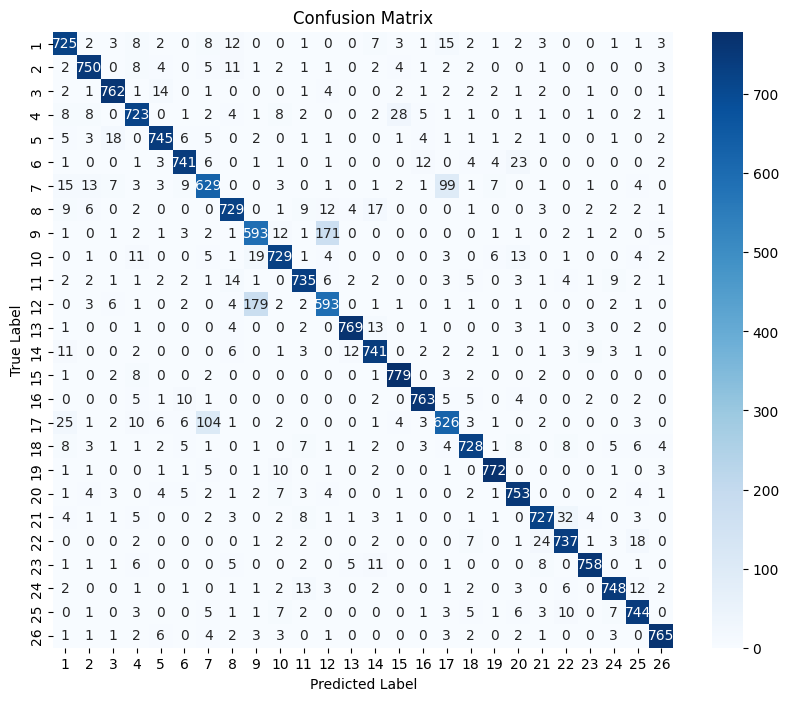

{'Accuracy': 0.9069230769230769, 'Macro_F1': 0.9068942754495564}

In [16]:
eval(model,X_test,y_test,batch_size=2048,plot_cm=True)

In [17]:
model2 = NN(Linear(28*28,1024,initializer="xavier"),Sigmoid(),Dropout(.3),Linear(1024,26),Softmax())
model2

Linear(784,1024)
Sigmoid
Dropout(30.0%)
Linear(1024,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_Sigmoid_Dropout(30.0%)_Linear(1024,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.040889756377689615, val_loss[epoch]=0.41797860928599234, train_eval[epoch]={'Accuracy': 0.8124151583710407, 'Macro_F1': 0.8120095676137714}, val_eval[epoch]={'Accuracy': 0.7998931623931624, 'Macro_F1': 0.7992753674034632}
epoch=1, train_loss[epoch]=0.02477792761336504, val_loss[epoch]=0.3231711203002729, train_eval[epoch]={'Accuracy': 0.8637443438914028, 'Macro_F1': 0.8635388472806176}, val_eval[epoch]={'Accuracy': 0.8435897435897436, 'Macro_F1': 0.8430825013012286}
epoch=2, train_loss[epoch]=0.01997603796235054, val_loss[epoch]=0.2773585968835116, train_eval[epoch]={'Accuracy': 0.8893288084464555, 'Macro_F1': 0.8891090306388154}, val_eval[epoch]={'Accuracy': 0.8629807692307693, 'Macro_F1': 0.8624479181918053}
epoch=3, train_loss[epoch]=0.016987353646566852, val_loss[epoch]=0.25033287119254816, train_eval[epoch]={'Accuracy': 0

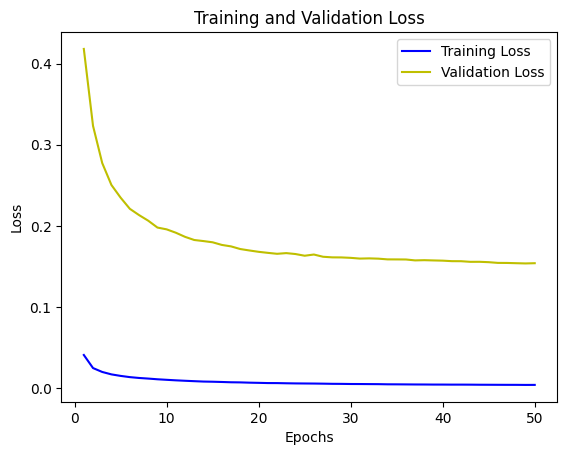

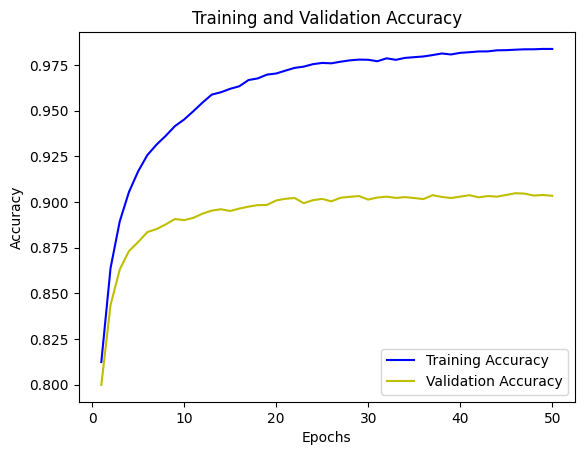

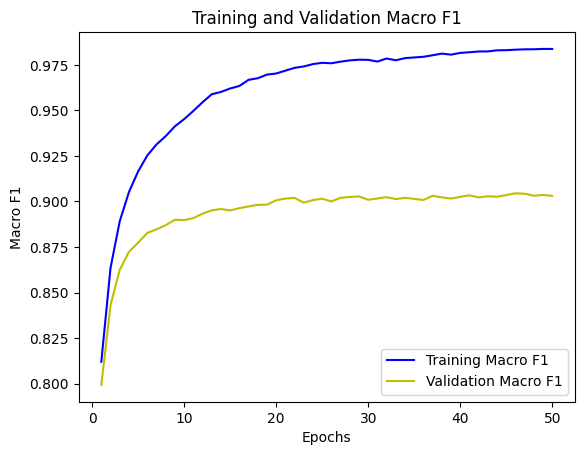

In [18]:
train_loss,val_loss,train_eval,val_eval = model2.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

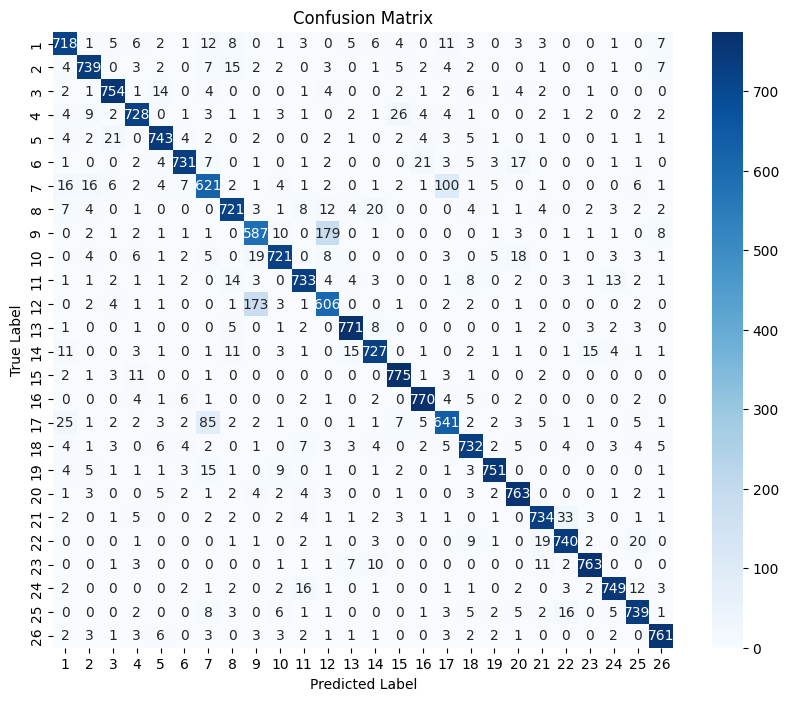

{'Accuracy': 0.9047115384615385, 'Macro_F1': 0.9047785832356403}

In [19]:
eval(model2,X_test,y_test,batch_size=4096,plot_cm=True)

In [20]:
model3 = NN(Linear(28*28,512),ReLU(),Dropout(.2),Linear(512,512),ReLU(),Dropout(0.1),Linear(512,26),Softmax())
model3

Linear(784,512)
ReLU
Dropout(20.0%)
Linear(512,512)
ReLU
Dropout(10.0%)
Linear(512,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,512)_ReLU_Dropout(20.0%)_Linear(512,512)_ReLU_Dropout(10.0%)_Linear(512,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.030450353775317622, val_loss[epoch]=0.2693235491305715, train_eval[epoch]={'Accuracy': 0.8747926093514329, 'Macro_F1': 0.8741800304448534}, val_eval[epoch]={'Accuracy': 0.8610042735042736, 'Macro_F1': 0.8597996008729463}
epoch=1, train_loss[epoch]=0.017427964072925333, val_loss[epoch]=0.22605951043320927, train_eval[epoch]={'Accuracy': 0.8978883861236803, 'Macro_F1': 0.8974297704546073}, val_eval[epoch]={'Accuracy': 0.8751602564102564, 'Macro_F1': 0.8743632541822944}
epoch=2, train_loss[epoch]=0.01512546358956761, val_loss[epoch]=0.2074155687070418, train_eval[epoch]={'Accuracy': 0.9109822775263952, 'Macro_F1': 0.9107595527225393}, val_eval[epoch]={'Accuracy': 0.8859508547008547, 'Macro_F1': 0.8854562169722924}
epoch=3, train_loss[epoch]=0.013750519304793015, val_loss[epoch]=0.19160843274583614, 

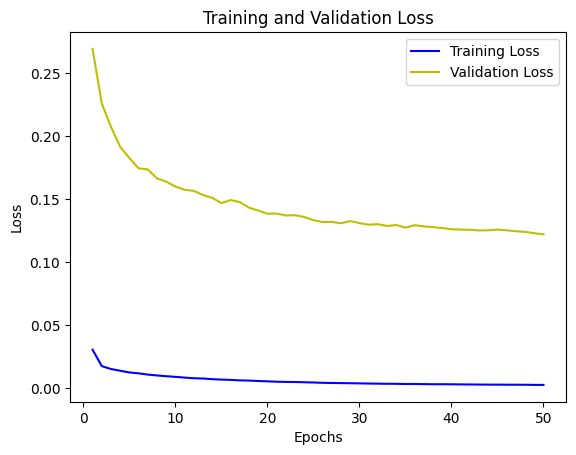

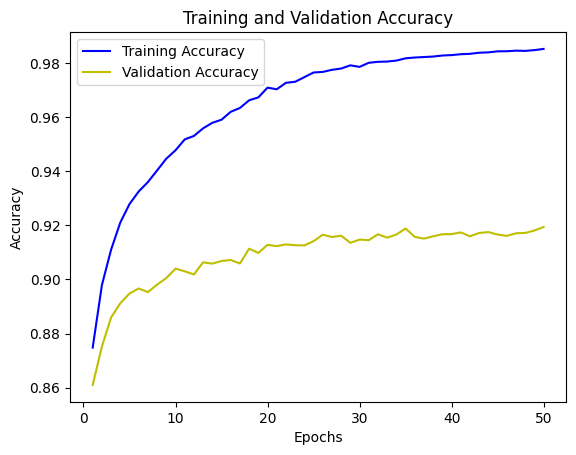

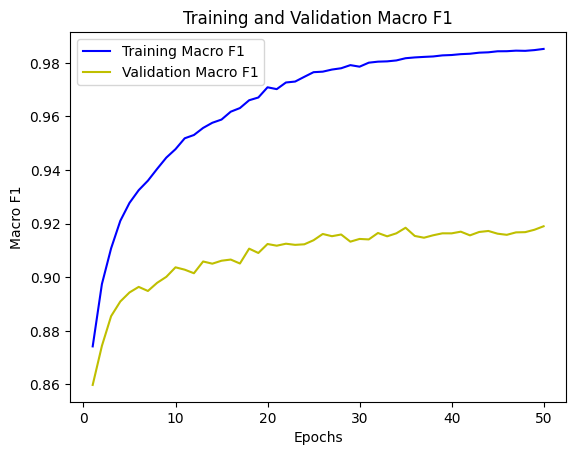

In [21]:
train_loss,val_loss,train_eval,val_eval = model3.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

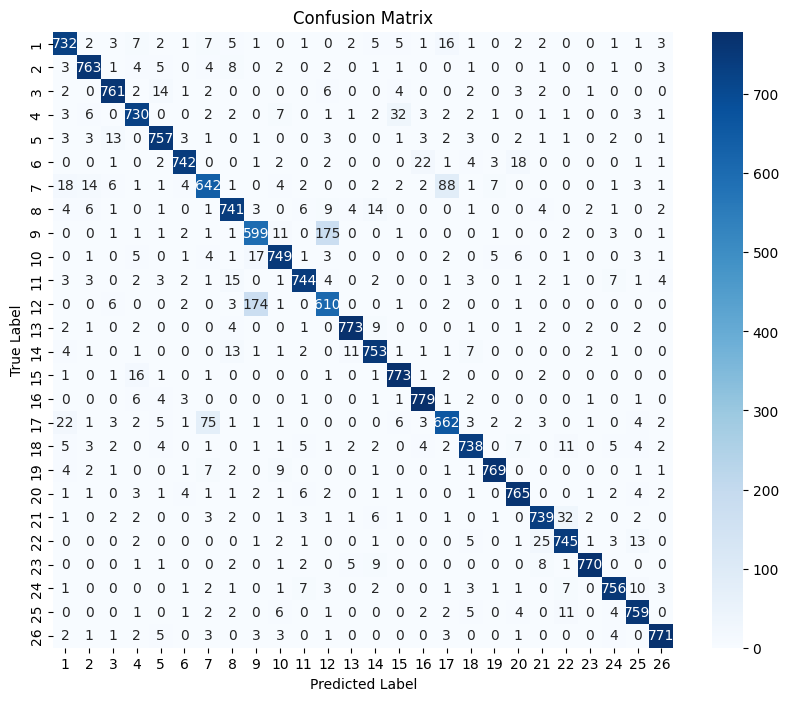

{'Accuracy': 0.9193269230769231, 'Macro_F1': 0.9193380207751188}

In [22]:
eval(model3,X_test,y_test,batch_size=4096,plot_cm=True)

In [23]:
model4 = NN(Linear(28*28,1024),ReLU(),Dropout(0.2),Linear(1024,512),ReLU(),Dropout(0.2),Linear(512,26),Softmax())
model4

Linear(784,1024)
ReLU
Dropout(20.0%)
Linear(1024,512)
ReLU
Dropout(20.0%)
Linear(512,26)
Softmax

[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(20.0%)_Linear(1024,512)_ReLU_Dropout(20.0%)_Linear(512,26)_Softmax_.pkl'
epoch=0, train_loss[epoch]=0.03430214732851046, val_loss[epoch]=0.2837835393942395, train_eval[epoch]={'Accuracy': 0.8704374057315234, 'Macro_F1': 0.8701737798949642}, val_eval[epoch]={'Accuracy': 0.8544871794871794, 'Macro_F1': 0.8536720756686673}
epoch=1, train_loss[epoch]=0.019298568371856596, val_loss[epoch]=0.23849530053253004, train_eval[epoch]={'Accuracy': 0.8879807692307692, 'Macro_F1': 0.8872411844046509}, val_eval[epoch]={'Accuracy': 0.86875, 'Macro_F1': 0.8672028618077051}
epoch=2, train_loss[epoch]=0.017134395616301732, val_loss[epoch]=0.21946082953152302, train_eval[epoch]={'Accuracy': 0.9016119909502263, 'Macro_F1': 0.901753687678759}, val_eval[epoch]={'Accuracy': 0.8801282051282051, 'Macro_F1': 0.879918788958701}
epoch=3, train_loss[epoch]=0.015441386006021554, val_loss[epoch]=0.20345463636563058, train_eval

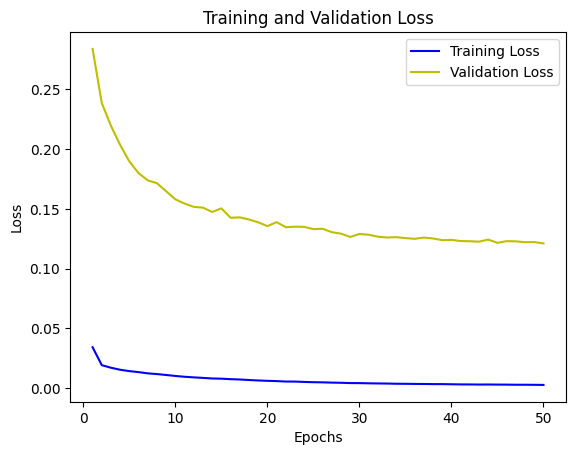

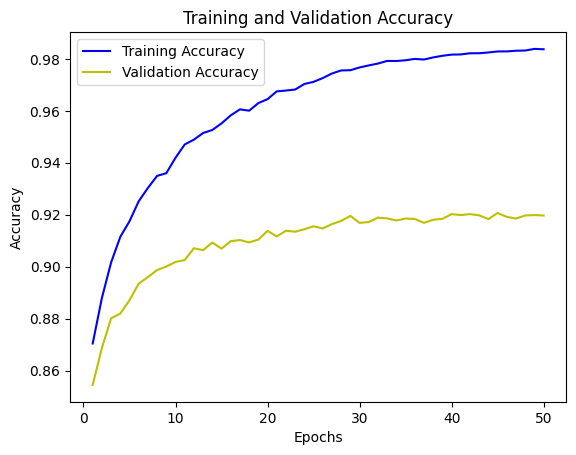

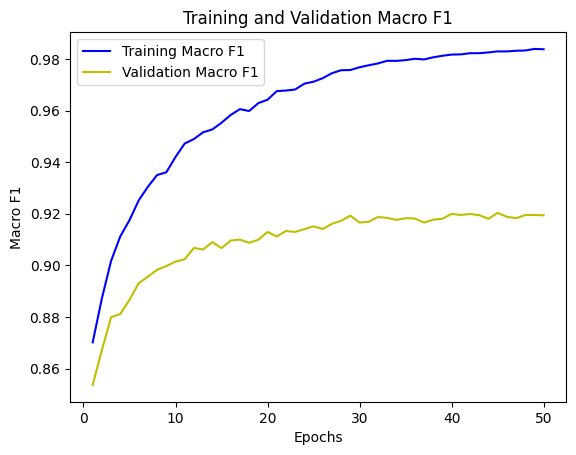

In [24]:
train_loss,val_loss,train_eval,val_eval = model4.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=50, 
                                                      batch_size=1024, 
                                                      learning_rate=5e-3,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=True) 
plot(train_loss,val_loss,train_eval,val_eval)

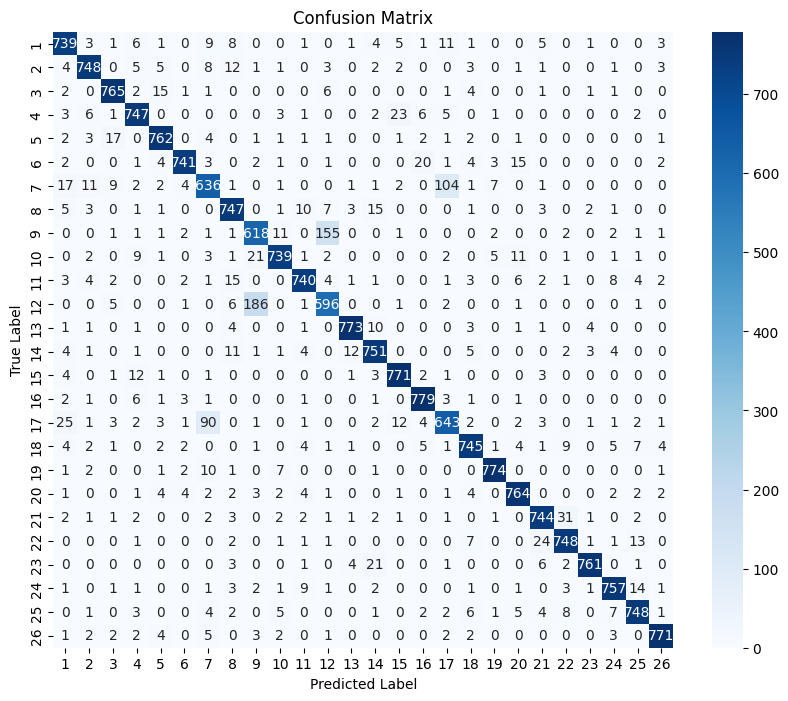

{'Accuracy': 0.9186057692307692, 'Macro_F1': 0.918629124047128}

In [25]:
eval(model4,X_test,y_test,batch_size=4096,plot_cm=True)

learning_rate=0.001

model=Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax


epoch=0, train_loss[epoch]=0.04324560360333724, val_loss[epoch]=0.39447527269191407, train_eval[epoch]={'Accuracy': 0.8237745098039215, 'Macro_F1': 0.8233031034387709}, val_eval[epoch]={'Accuracy': 0.8083867521367522, 'Macro_F1': 0.807262445353345}
epoch=1, train_loss[epoch]=0.023909512998211854, val_loss[epoch]=0.3199560120403109, train_eval[epoch]={'Accuracy': 0.8683352187028658, 'Macro_F1': 0.8680566583967063}, val_eval[epoch]={'Accuracy': 0.8473290598290598, 'Macro_F1': 0.8465510895634344}
epoch=2, train_loss[epoch]=0.019329388131810663, val_loss[epoch]=0.2814042142159451, train_eval[epoch]={'Accuracy': 0.8896493212669683, 'Macro_F1': 0.8895410841696489}, val_eval[epoch]={'Accuracy': 0.864155982905983, 'Macro_F1': 0.8634712264824645}
epoch=3, train_loss[epoch]=0.016726746573570126, val_loss[epoch]=0.2574590443332365, train_eval[epoch]={'Accuracy': 0.9054675716440422, 'Macro_F1': 0.905503450647

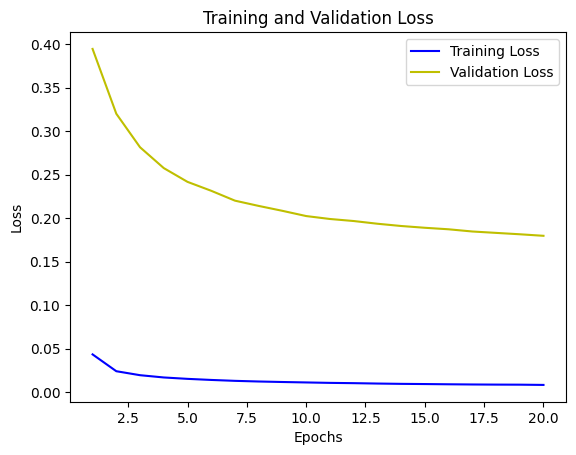

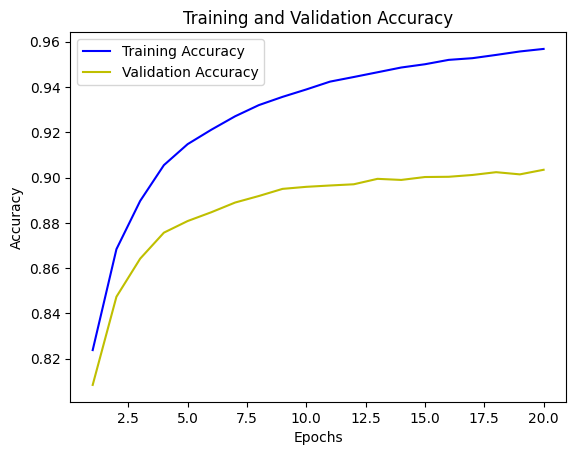

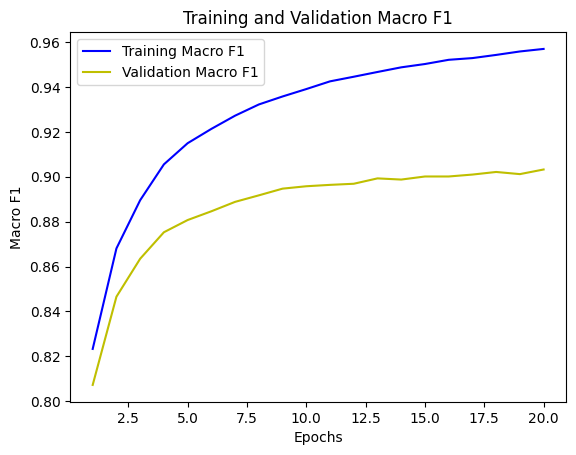

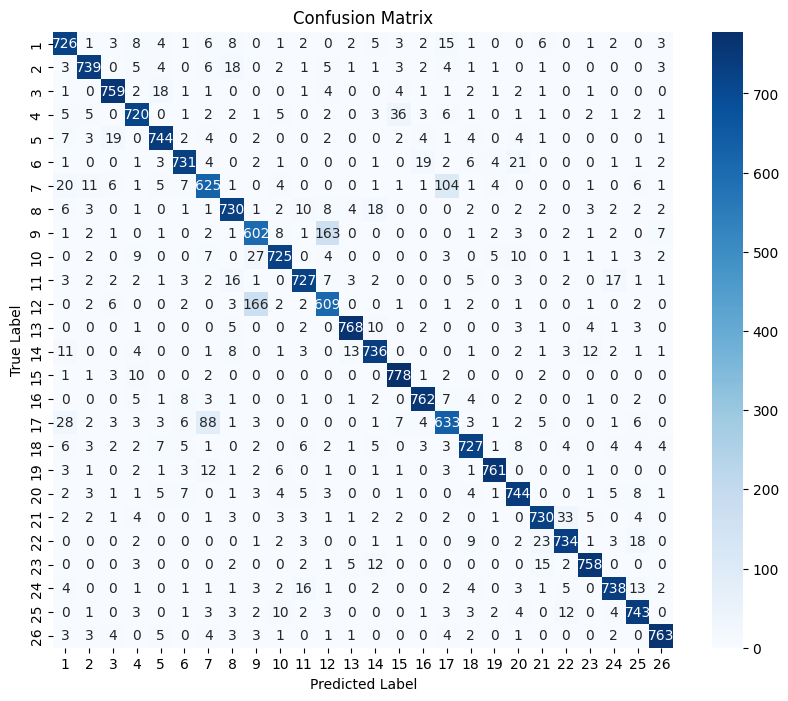

Test Accuracy: 0.9044230769230769  Test Macro_F1: 0.9045151635760406

 ==================x================== 

learning_rate=0.001

model=Linear(784,512)
ReLU
Dropout(20.0%)
Linear(512,512)
ReLU
Dropout(10.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.04597394652861034, val_loss[epoch]=0.38729820387453945, train_eval[epoch]={'Accuracy': 0.821408371040724, 'Macro_F1': 0.8209899745872431}, val_eval[epoch]={'Accuracy': 0.809508547008547, 'Macro_F1': 0.8085607025096107}
epoch=1, train_loss[epoch]=0.022868173060963483, val_loss[epoch]=0.29056359424780975, train_eval[epoch]={'Accuracy': 0.8742175716440422, 'Macro_F1': 0.8742848901062253}, val_eval[epoch]={'Accuracy': 0.8571047008547008, 'Macro_F1': 0.8567715845178043}
epoch=2, train_loss[epoch]=0.017960266564975663, val_loss[epoch]=0.2501320024839268, train_eval[epoch]={'Accuracy': 0.8941930618401207, 'Macro_F1': 0.893798478791375}, val_eval[epoch]={'Accuracy': 0.8733440170940171, 'Macro_F1': 0.8726247047715721}
epoch=3, train_lo

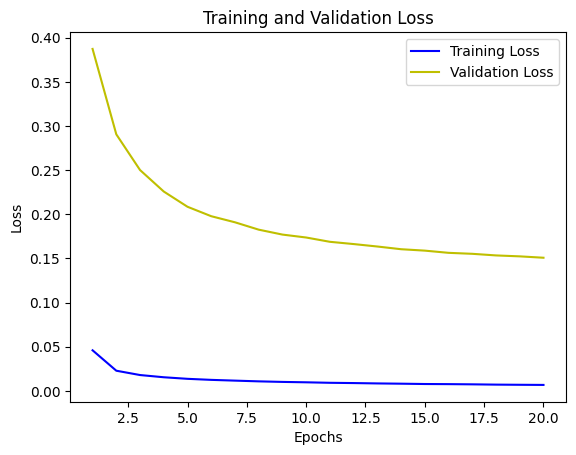

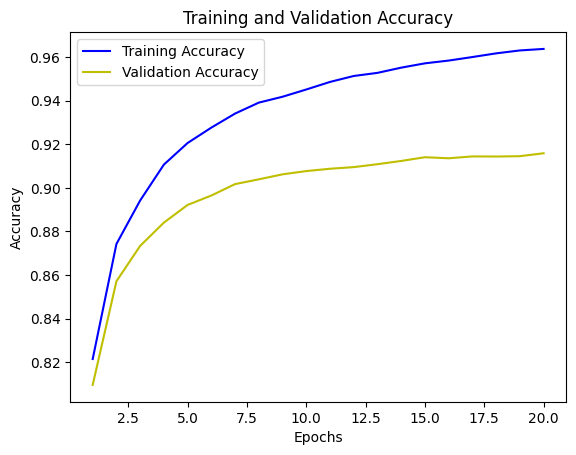

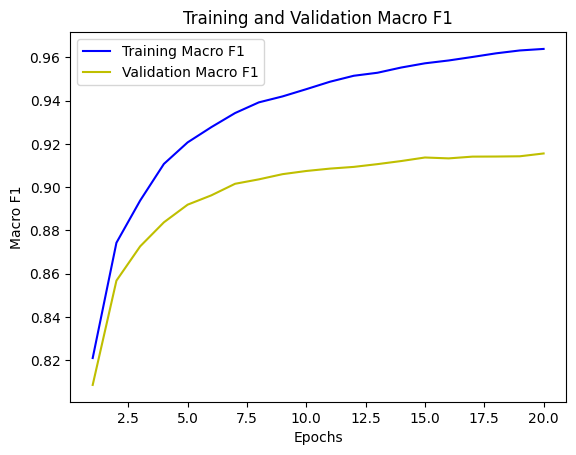

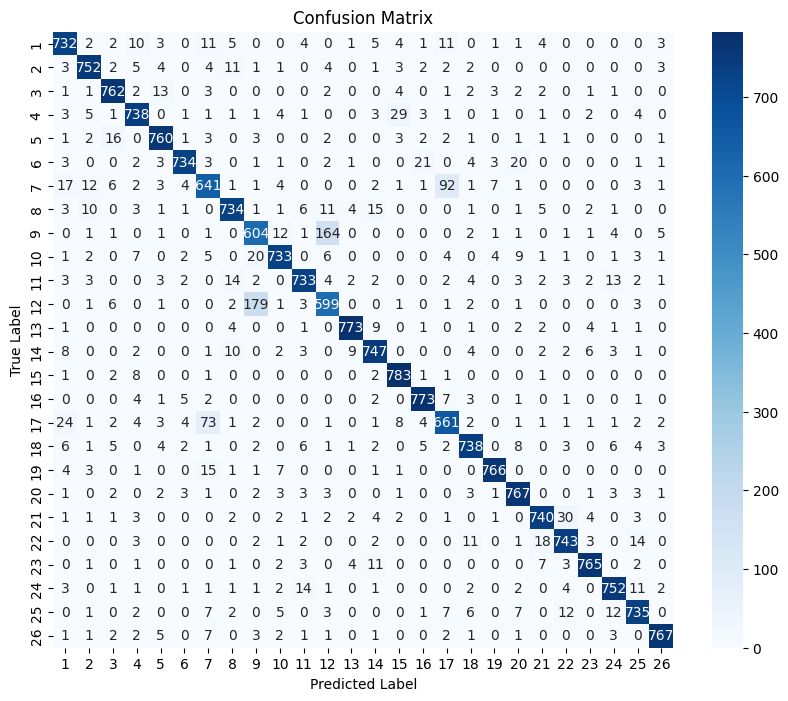

Test Accuracy: 0.915  Test Macro_F1: 0.9150753146863504

 ==================x================== 

learning_rate=0.001

model=Linear(784,1024)
ReLU
Dropout(20.0%)
Linear(1024,512)
ReLU
Dropout(20.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.04097130175228472, val_loss[epoch]=0.34410899975930614, train_eval[epoch]={'Accuracy': 0.8476904223227752, 'Macro_F1': 0.8479066086222377}, val_eval[epoch]={'Accuracy': 0.8371794871794872, 'Macro_F1': 0.8370549996543629}
epoch=1, train_loss[epoch]=0.02039377368766557, val_loss[epoch]=0.265496547865589, train_eval[epoch]={'Accuracy': 0.8883484162895927, 'Macro_F1': 0.8879745118458975}, val_eval[epoch]={'Accuracy': 0.8680555555555556, 'Macro_F1': 0.867202549306824}
epoch=2, train_loss[epoch]=0.015886071665011957, val_loss[epoch]=0.22946518758797174, train_eval[epoch]={'Accuracy': 0.910642911010558, 'Macro_F1': 0.910632827409783}, val_eval[epoch]={'Accuracy': 0.8860042735042735, 'Macro_F1': 0.8855673765442613}
epoch=3, train_loss[epoch]=0.0

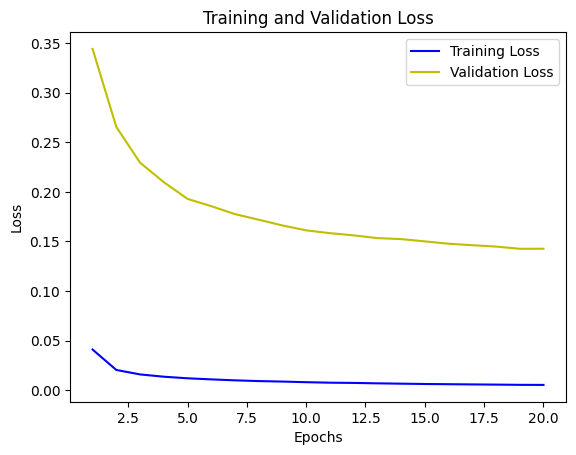

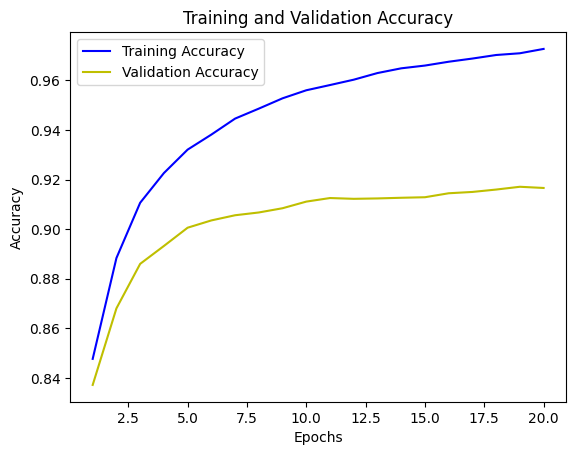

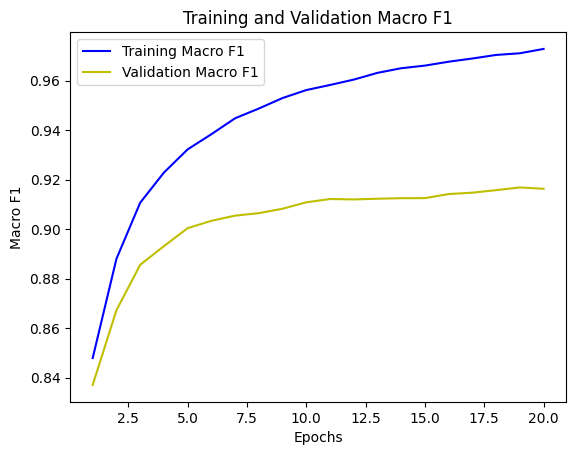

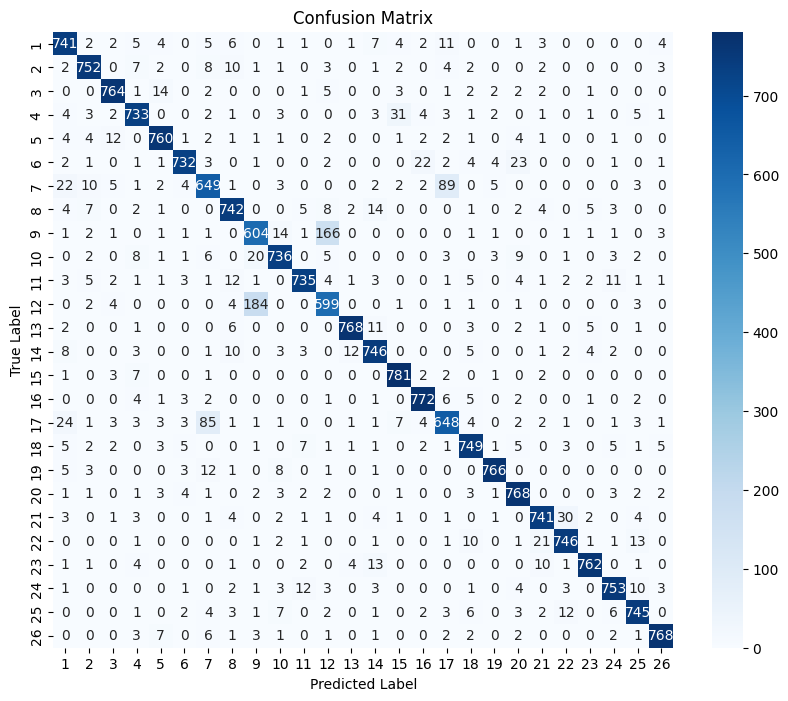

Test Accuracy: 0.9163461538461538  Test Macro_F1: 0.9164270500360931
[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(20.0%)_Linear(1024,512)_ReLU_Dropout(20.0%)_Linear(512,26)_Softmax_+_learning_rate=0.001.pkl'

 ==================x================== 

learning_rate=0.0005

model=Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax


epoch=0, train_loss[epoch]=0.05208251931936746, val_loss[epoch]=0.4799622811288175, train_eval[epoch]={'Accuracy': 0.777922322775264, 'Macro_F1': 0.7775639933109103}, val_eval[epoch]={'Accuracy': 0.7711004273504274, 'Macro_F1': 0.7705025120318898}
epoch=1, train_loss[epoch]=0.02937949357412234, val_loss[epoch]=0.3983422282918834, train_eval[epoch]={'Accuracy': 0.8321455505279035, 'Macro_F1': 0.8321758615158212}, val_eval[epoch]={'Accuracy': 0.8185363247863248, 'Macro_F1': 0.8181427384712674}
epoch=2, train_loss[epoch]=0.024130337997122456, val_loss[epoch]=0.35046669797171254, train_eval[epoch]={'Accuracy

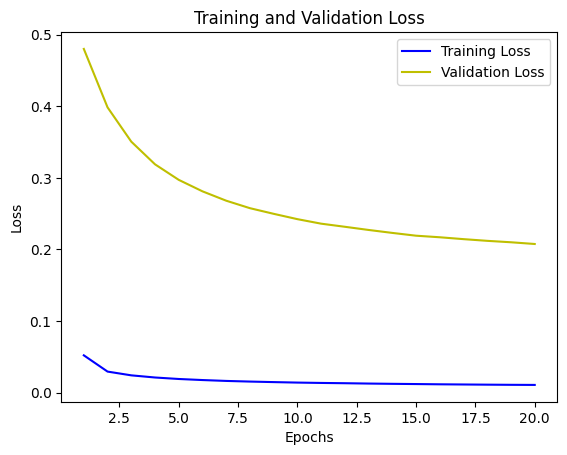

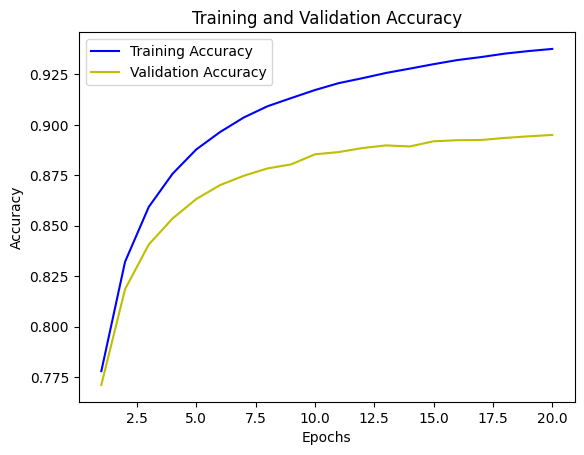

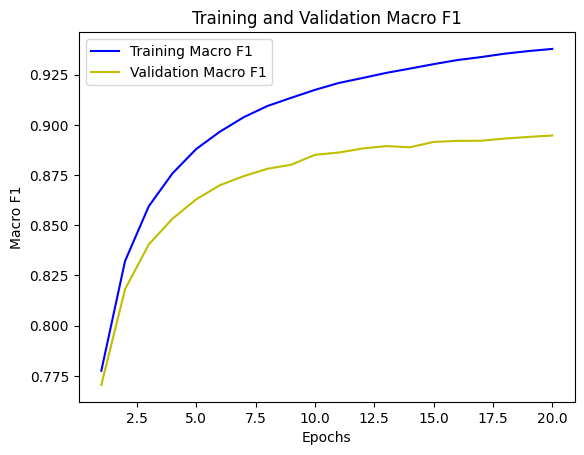

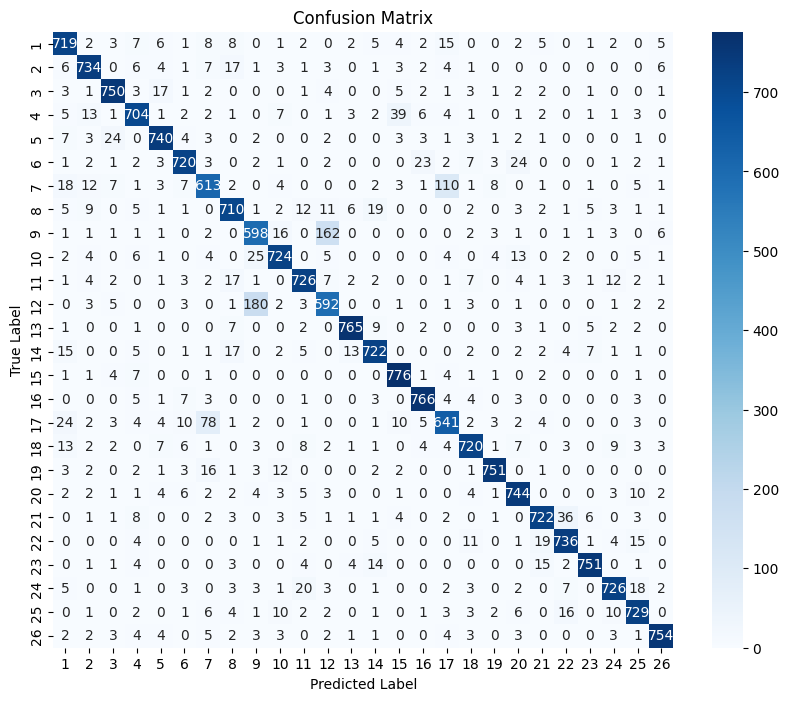

Test Accuracy: 0.8958173076923077  Test Macro_F1: 0.8958689218288824
[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(30.0%)_Linear(1024,26)_Softmax_+_learning_rate=0.0005.pkl'

 ==================x================== 

learning_rate=0.0005

model=Linear(784,512)
ReLU
Dropout(20.0%)
Linear(512,512)
ReLU
Dropout(10.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.055738527433552794, val_loss[epoch]=0.4753119298342189, train_eval[epoch]={'Accuracy': 0.7742835595776772, 'Macro_F1': 0.772369556873553}, val_eval[epoch]={'Accuracy': 0.7672542735042736, 'Macro_F1': 0.7649896341126899}
epoch=1, train_loss[epoch]=0.029172824891765835, val_loss[epoch]=0.36341159577131, train_eval[epoch]={'Accuracy': 0.83802790346908, 'Macro_F1': 0.8375428255678916}, val_eval[epoch]={'Accuracy': 0.8275106837606837, 'Macro_F1': 0.8265605262985137}
epoch=2, train_loss[epoch]=0.02299653042000421, val_loss[epoch]=0.31003895939131026, train_eval[epoch]={'Accuracy': 0

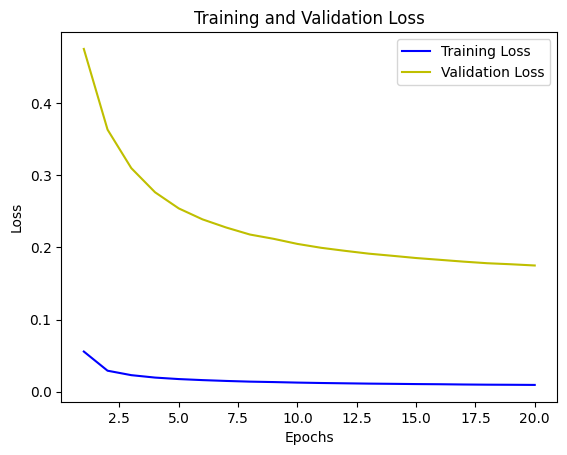

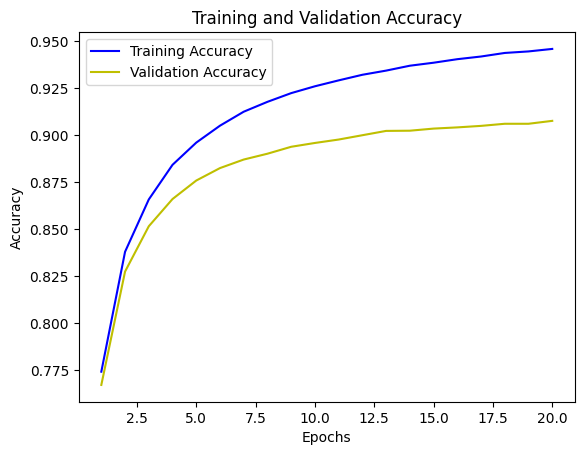

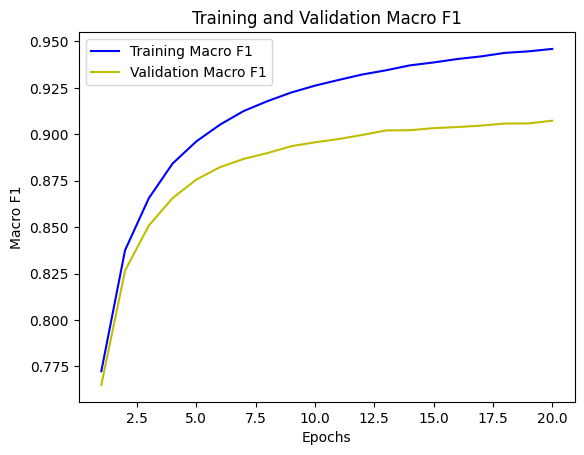

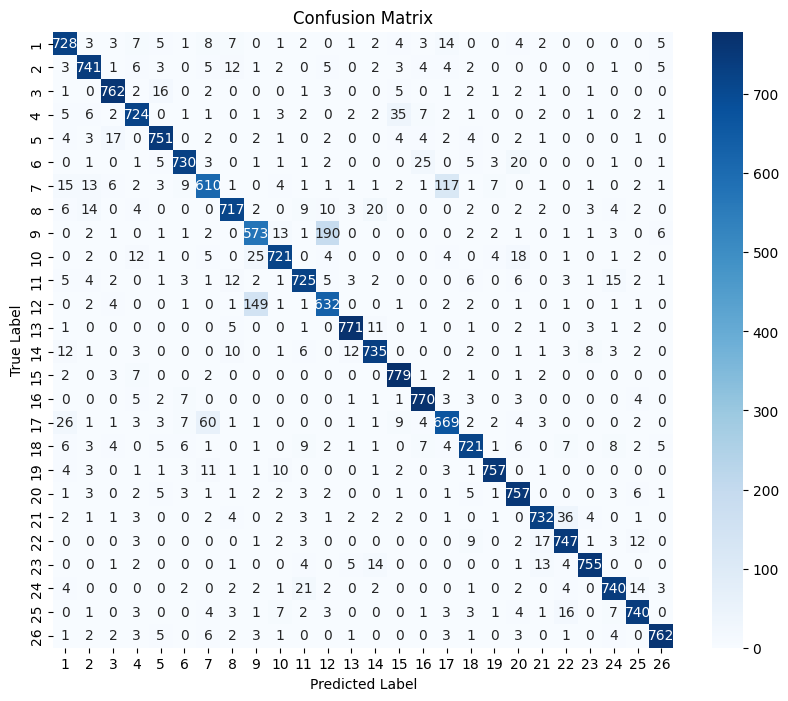

Test Accuracy: 0.906201923076923  Test Macro_F1: 0.906167250468907
[WinError 2] The system cannot find the file specified: 'model_Linear(784,512)_ReLU_Dropout(20.0%)_Linear(512,512)_ReLU_Dropout(10.0%)_Linear(512,26)_Softmax_+_learning_rate=0.0005.pkl'

 ==================x================== 

learning_rate=0.0005

model=Linear(784,1024)
ReLU
Dropout(20.0%)
Linear(1024,512)
ReLU
Dropout(20.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.04955941867760156, val_loss[epoch]=0.42599321636591614, train_eval[epoch]={'Accuracy': 0.8056843891402715, 'Macro_F1': 0.8049250168596138}, val_eval[epoch]={'Accuracy': 0.7956196581196581, 'Macro_F1': 0.7943431694462579}
epoch=1, train_loss[epoch]=0.02572098763997591, val_loss[epoch]=0.32482335948327556, train_eval[epoch]={'Accuracy': 0.8604543740573153, 'Macro_F1': 0.8603498367741934}, val_eval[epoch]={'Accuracy': 0.8443376068376068, 'Macro_F1': 0.8437065317086723}
epoch=2, train_loss[epoch]=0.020204373113613873, val_loss[epoch]=0.27766516677

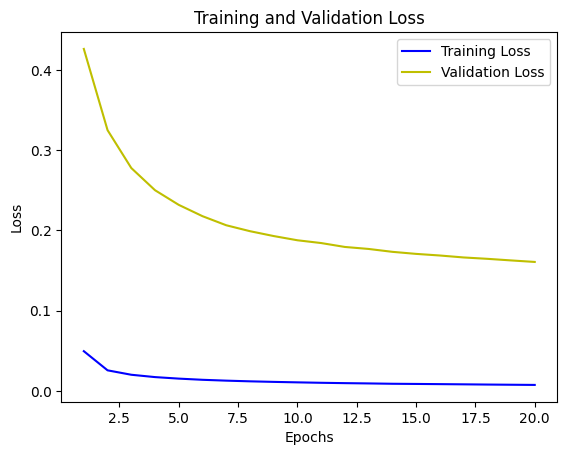

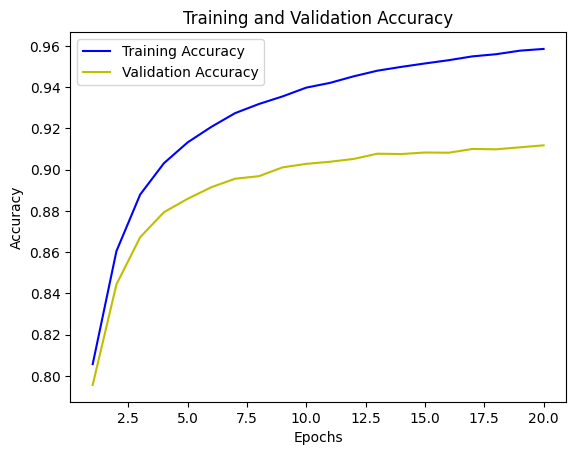

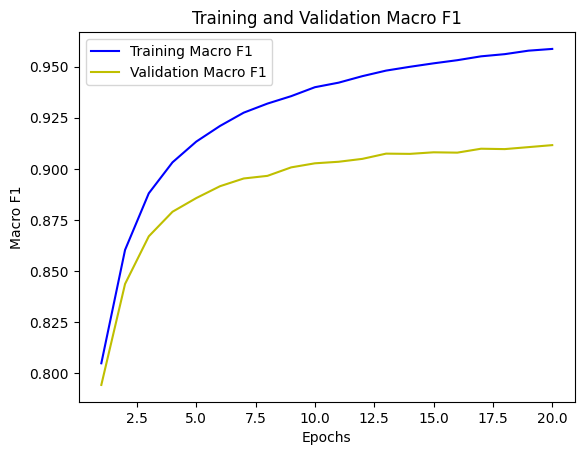

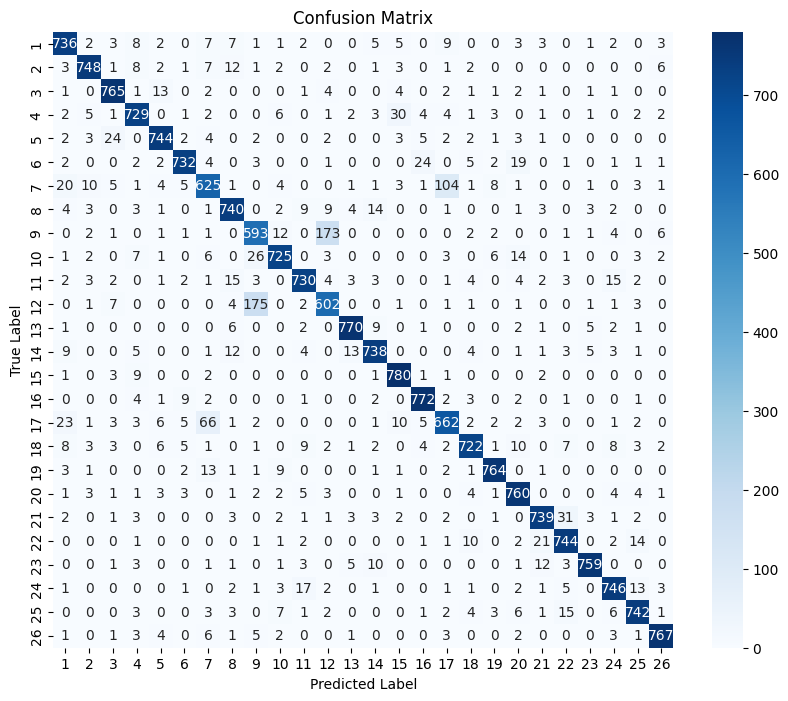

Test Accuracy: 0.9102884615384615  Test Macro_F1: 0.910284783563455
[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(20.0%)_Linear(1024,512)_ReLU_Dropout(20.0%)_Linear(512,26)_Softmax_+_learning_rate=0.0005.pkl'

 ==================x================== 

learning_rate=0.0001

model=Linear(784,1024)
ReLU
Dropout(30.0%)
Linear(1024,26)
Softmax


epoch=0, train_loss[epoch]=0.08735968508686406, val_loss[epoch]=0.8309333904113946, train_eval[epoch]={'Accuracy': 0.626527149321267, 'Macro_F1': 0.622313043704085}, val_eval[epoch]={'Accuracy': 0.621741452991453, 'Macro_F1': 0.6180200184823439}
epoch=1, train_loss[epoch]=0.05110812806391425, val_loss[epoch]=0.6677382304048288, train_eval[epoch]={'Accuracy': 0.7036576168929111, 'Macro_F1': 0.7019554196726183}, val_eval[epoch]={'Accuracy': 0.7010149572649572, 'Macro_F1': 0.699482473556504}
epoch=2, train_loss[epoch]=0.04222025598717967, val_loss[epoch]=0.5909519971900007, train_eval[epoch]={'Accuracy': 0.

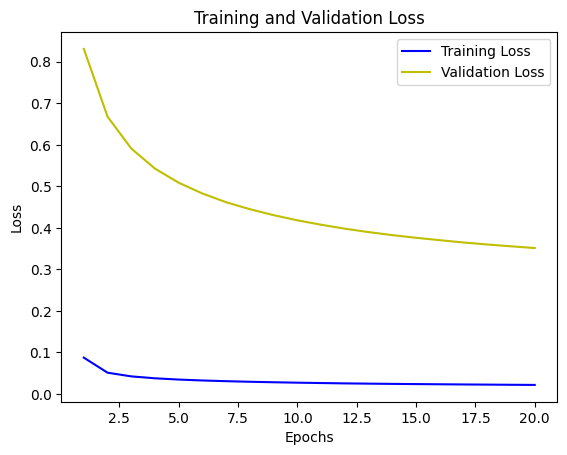

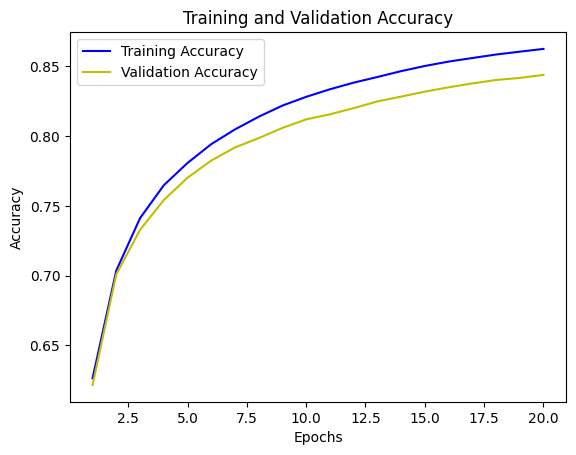

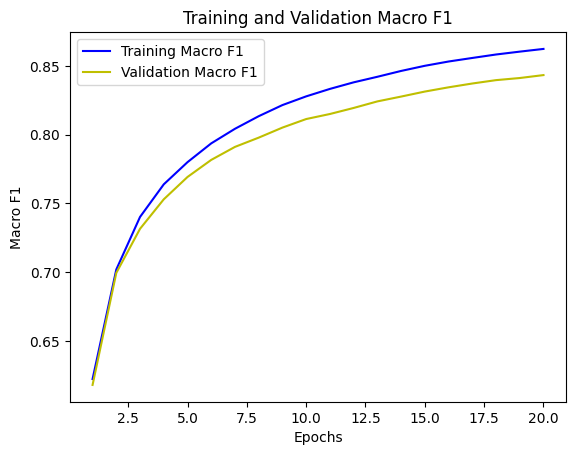

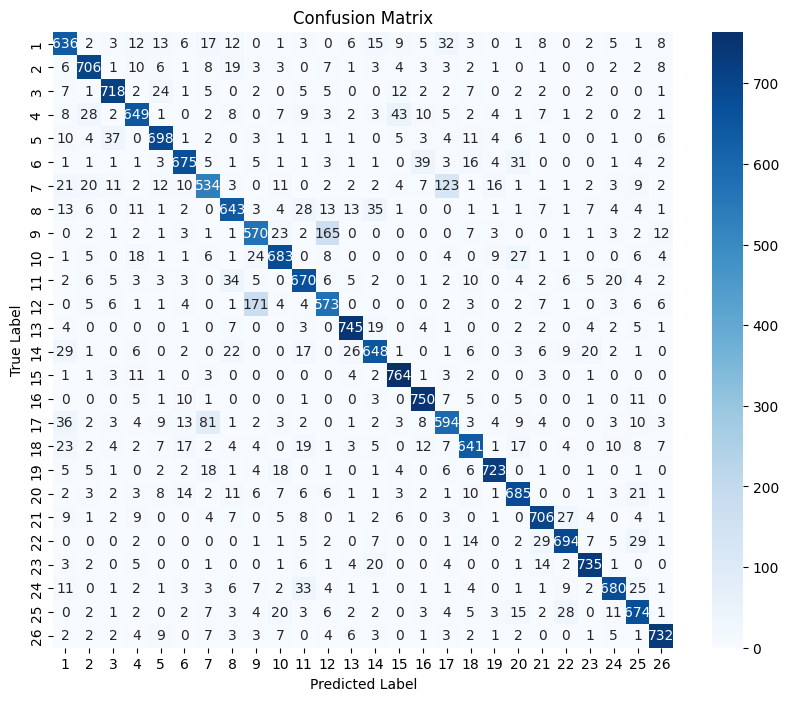

Test Accuracy: 0.8425961538461538  Test Macro_F1: 0.8422841962586056
[WinError 2] The system cannot find the file specified: 'model_Linear(784,1024)_ReLU_Dropout(30.0%)_Linear(1024,26)_Softmax_+_learning_rate=0.0001.pkl'

 ==================x================== 

learning_rate=0.0001

model=Linear(784,512)
ReLU
Dropout(20.0%)
Linear(512,512)
ReLU
Dropout(10.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.09476276245511639, val_loss[epoch]=0.9200623473986245, train_eval[epoch]={'Accuracy': 0.5883955505279035, 'Macro_F1': 0.5793732106211484}, val_eval[epoch]={'Accuracy': 0.5802884615384616, 'Macro_F1': 0.5709934193270988}
epoch=1, train_loss[epoch]=0.054954752654079994, val_loss[epoch]=0.6707823710492786, train_eval[epoch]={'Accuracy': 0.6867269984917044, 'Macro_F1': 0.6838966593846997}, val_eval[epoch]={'Accuracy': 0.6796474358974359, 'Macro_F1': 0.6765833906116764}
epoch=2, train_loss[epoch]=0.04337213639413194, val_loss[epoch]=0.5710959406541082, train_eval[epoch]={'Accuracy'

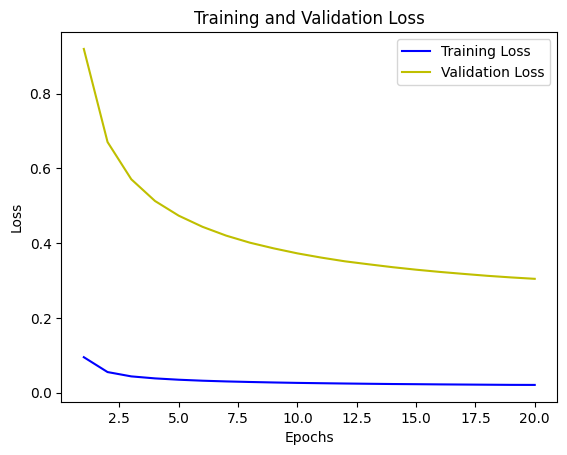

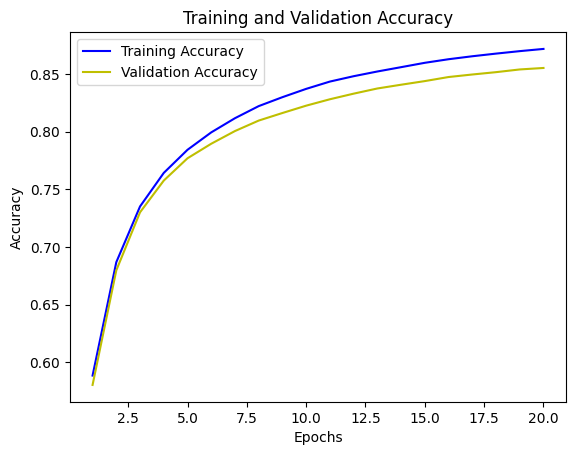

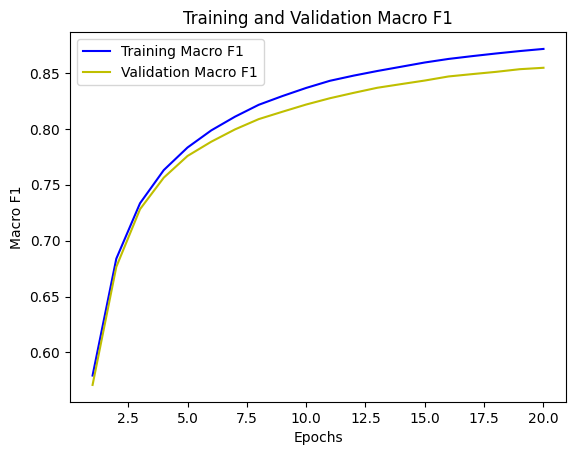

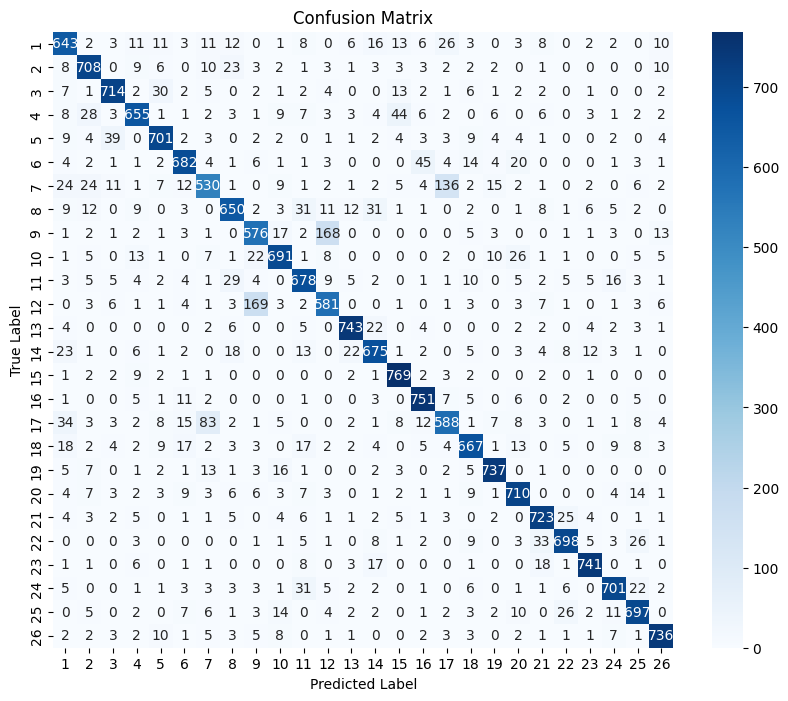

Test Accuracy: 0.853125  Test Macro_F1: 0.852632510101414
[WinError 2] The system cannot find the file specified: 'model_Linear(784,512)_ReLU_Dropout(20.0%)_Linear(512,512)_ReLU_Dropout(10.0%)_Linear(512,26)_Softmax_+_learning_rate=0.0001.pkl'

 ==================x================== 

learning_rate=0.0001

model=Linear(784,1024)
ReLU
Dropout(20.0%)
Linear(1024,512)
ReLU
Dropout(20.0%)
Linear(512,26)
Softmax


epoch=0, train_loss[epoch]=0.08438574891830532, val_loss[epoch]=0.7574620348065827, train_eval[epoch]={'Accuracy': 0.6450320512820513, 'Macro_F1': 0.640837110718856}, val_eval[epoch]={'Accuracy': 0.6413461538461539, 'Macro_F1': 0.636678914256186}
epoch=1, train_loss[epoch]=0.0468280904445318, val_loss[epoch]=0.5754299617426012, train_eval[epoch]={'Accuracy': 0.7339366515837104, 'Macro_F1': 0.7324514128873639}, val_eval[epoch]={'Accuracy': 0.7292735042735042, 'Macro_F1': 0.7273094742955475}


In [11]:
lrs = [1e-3,5e-4,1e-4]
n_epochs = 20

for learning_rate in lrs: 
    model1 = NN(Linear(28*28,1024),ReLU(),Dropout(0.3),Linear(1024,26),Softmax())
    model3 = NN(Linear(28*28,512),ReLU(),Dropout(.2),Linear(512,512),ReLU(),Dropout(0.1),Linear(512,26),Softmax())
    model4 = NN(Linear(28*28,1024),ReLU(),Dropout(0.2),Linear(1024,512),ReLU(),Dropout(0.2),Linear(512,26),Softmax())
    models = [model1,model3,model4]
    for model in models:
        print(f"{learning_rate=}\n")
        print(f"{model=}\n")
        train_loss,val_loss,train_eval,val_eval = model.train(loss=cross_entropy, 
                                                      loss_grad=cross_entropy_grad, 
                                                      X=X_train, y=y_train, 
                                                      epochs=n_epochs, 
                                                      batch_size=2048, 
                                                      learning_rate=learning_rate,
                                                      eval_function=eval,
                                                      best_model_comparator=best_model_comparator,  
                                                      load_best_model_at_end=True,
                                                      save_best_model_at_each_epoch=False) 
        plot(train_loss,val_loss,train_eval,val_eval)
        eval_ = eval(model,X_test,y_test,batch_size=4096,plot_cm=True)
        acc, macro_f1 = eval_["Accuracy"], eval_["Macro_F1"]
        print(f"Test Accuracy: {acc}  Test Macro_F1: {macro_f1}")
        model.save(f"{model.model_name()}+_{learning_rate=}.pkl")
        print("\n ==================x================== \n")
        
        